# Written for flowers: ROSE, TULIP, SUNFLOWER!

In [1]:
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Input, Conv2D, MaxPool2D
from keras.utils import np_utils
from keras.models import Model
import matplotlib.pyplot as plt
import matplotlib
import os
from keras.models import Sequential
import theano
from PIL import Image
from numpy import *
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

Using TensorFlow backend.
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\Kaiwalya\Downloads\WinPython\python-3.6.5.amd64\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
C:\Users\Kaiwalya\Downloads\WinPython\python-3.6.5.amd64\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection

In [48]:
batch_size = 5
nb_classes = 3
nb_epoch = 32

# input image dimensions
img_rows, img_cols = 200, 200
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
pool_size = (2, 2)  ## 4 ELEMENTS, TOOK MAX OF IT
# convolution kernel size
kernel_size = (3, 3)

In [49]:
path1 = 'C:/Users/Kaiwalya/Desktop/ML/Datasets/flowers/Mixed/'    #path of folder of images    
path2 = 'C:/Users/Kaiwalya/Desktop/ML/Datasets/flowers/Mix_greyscale/'  #path of folder to save images    

In [50]:
listing = os.listdir(path1) 

In [51]:
num_samples=size(listing)
print (num_samples)

531


In [52]:
for file in listing:
    im = Image.open(path1 + '\\' + file)   
    img = im.resize((img_rows,img_cols))
    gray = img.convert('L')
                #need to do some more processing here           
    gray.save(path2 +'\\' +  file, "JPEG")

In [53]:
imlist = os.listdir(path2)

In [54]:
img_data_list=[]
im1 = array(Image.open('Mix_greyscale' + '\\'+ imlist[0])) # open one image to get size
m,n = im1.shape[0:2] # get the size of the images
imnbr = len(imlist) # get the number of images


In [55]:
immatrix = array([array(Image.open('Mix_greyscale'+ '\\' + im2)).flatten()
              for im2 in imlist],'f')

In [56]:
label=np.ones((num_samples,),dtype = int)
label[0:178]=0
label[178:354]=1
label[354:]=2

In [57]:
data,Label = shuffle(immatrix,label, random_state=2)
train_data = [data,Label]

(531, 40000)
(531,)


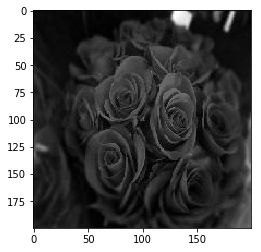

In [58]:
img=immatrix[167].reshape(img_rows,img_cols)
plt.imshow(img)
plt.imshow(img,cmap='gray')
print (train_data[0].shape)
print (train_data[1].shape)

In [59]:
(X, y) = (train_data[0],train_data[1])

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [61]:
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (1, img_rows, img_cols)

In [62]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (371, 200, 200, 1)
371 train samples
160 test samples


In [63]:
# convert class vectors to binary class matrices, ONE HOT ENCODING ie THE MATRIX
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [64]:
# build validation data
split = 0.7
split_value = int(0.7 * len(X_train))

X_val = X_train[split_value:]
Y_val = Y_train[split_value:]

X_train = X_train[:split_value]
Y_train = Y_train[:split_value]

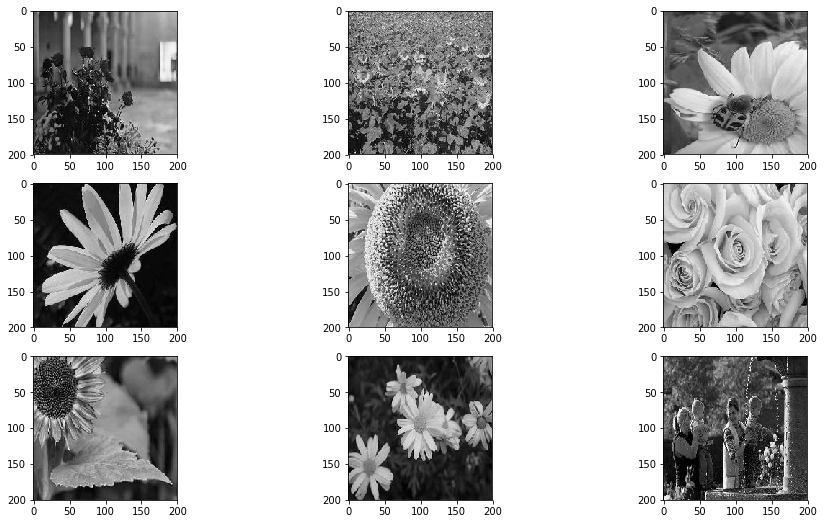

In [65]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(16, 9))
for i, axes in enumerate(ax.flat):
    axes.imshow(X_train[i, :, :, 0], cmap='gray')

In [76]:
## Building the CNN

inp = Input(shape=[200, 200, 1]) ## GREY SCALE 28X28 IMAGE

## BUILD LAYERS, KERNEL SIZE IS FILTER SIDE
layer1 = Conv2D(filters=nb_filters, 
                kernel_size=kernel_size, 
                strides=(1, 1), ## STEPS WE WANT TO SHIFT
                padding='same', ## IF WE DONT, WE MAY HAVE SMALLER SIZE OF IMAGE IN OUTPUT
                                ## LIKE MAYBE WE'LL LOSE A DIMENSION, WE WANT SAME SO USE IT!
                activation='relu')(inp)  ## AS USUAL, RELU
layer1_maxpool = MaxPool2D(pool_size=(2, 2), padding='same')(layer1) ## ATTACH ARCHITECTURE OF LAYER1, BY layer1
layer2 = Conv2D(filters=nb_filters,    ## TWEAK!!!
                kernel_size=kernel_size, 
                strides=(1, 1), 
                padding='same', 
                activation='relu')(layer1_maxpool)
layer2_maxpool = MaxPool2D(pool_size=(2, 2), padding='same')(layer2)
layer2x = Conv2D(filters=nb_filters,    ## TWEAK!!!
                kernel_size=kernel_size, 
                strides=(1, 1), 
                padding='same', 
                activation='relu')(layer2_maxpool)## AFTER THIS OUTPUT IS 14X14, AND HAVE 32 KERNELS, 14X14X32
layer2x_maxpool = MaxPool2D(pool_size=(2, 2), padding='same')(layer2x)
layer3x = Conv2D(filters=nb_filters,    ## TWEAK!!!
                kernel_size=kernel_size, 
                strides=(1, 1), 
                padding='same', 
                activation='relu')(layer2x_maxpool)
layer3x_maxpool = MaxPool2D(pool_size=(2, 2), padding='same')(layer3x)


layer3 = Flatten()(layer3x_maxpool)                                    ## FLATTEN CONSTRUCTS 1-D VECTORE OF HIGHER DIMENSION MATRIX

layer4 = Dense(units=128, activation='relu')(layer3)                  ## nn LAYER, DENSE IN KERAS. 128 IS NEURONS. 
layer5 = Dense(units=nb_classes, activation='softmax')(layer4)        ## 10 OUTPUT AT END OF LAYER, OUTPUT LAYER OF 10X10, PREDEFINED
                                                                      ## SOFTMAX FOR NORMALISATION
                                                                      ## SIMPLY TAKES EXPOENENT AND NORMALISES



In [77]:
model = path2

In [78]:
model = Model(inputs=inp, outputs=layer5)                             ## DEFINE ACTUAL MODEL, INP. OUTPUT IS LAYER5
                                                                      ## THIS CONTAINS WHOLE CNN MODEL. NOW GO FOR OPTIMISER AND ALL

model.compile(loss='categorical_crossentropy',                    ## SGD IS LIKE EXTENSION OF BINARY CROSS ENTROPY
              optimizer='sgd',                                        ## CATEGORICAL CAN BE CHANGED TO rmse OR SO...
              metrics=['accuracy'])

In [79]:
model.summary()    ## THE PARAM IS HOW MANY CAN BE TRAINABLE

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 200, 200, 1)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 200, 200, 32)      320       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 100, 100, 32)      9248      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 50, 50, 32)        9248      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 25, 25, 32)        0         
__________

In [80]:
## TAKES CARE OF ALL THE BPA AND MATHS
## MODEL.FIT= MODEL, SGD IS USED SO PASS BATCH_SIZE, EPOCH IS ITERATIONS
## LAST LINE IS PASSING VALIDATION DATA
history = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=1, validation_data=(X_val, Y_val))

C:\Users\Kaiwalya\Downloads\WinPython\python-3.6.5.amd64\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 259 samples, validate on 112 samples
Epoch 1/32
259/259 [==============================] - 18s 68ms/step - loss: 1.0961 - acc: 0.3707 - val_loss: 1.0794 - val_acc: 0.5000
Epoch 2/32
259/259 [==============================] - 17s 66ms/step - loss: 1.0853 - acc: 0.4093 - val_loss: 1.0699 - val_acc: 0.4464
Epoch 3/32
259/259 [==============================] - 17s 66ms/step - loss: 1.0619 - acc: 0.4672 - val_loss: 1.0293 - val_acc: 0.5268
Epoch 4/32
259/259 [==============================] - 18s 68ms/step - loss: 1.0453 - acc: 0.4942 - val_loss: 1.0751 - val_acc: 0.3929
Epoch 5/32
259/259 [==============================] - 17s 67ms/step - loss: 1.0234 - acc: 0.4826 - val_loss: 0.9895 - val_acc: 0.5536
Epoch 6/32
259/259 [==============================] - 19s 74ms/step - loss: 0.9963 - acc: 0.5058 - val_loss: 1.0095 - val_acc: 0.5089
Epoch 7/32
259/259 [==============================] - 18s 71ms/step - loss: 0.9682 - acc: 0.5212 - val_loss: 0.9962 - val_acc: 0.5000
Epoch 8/32
259/2

In [83]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 2.56123566628
Test accuracy: 0.4875


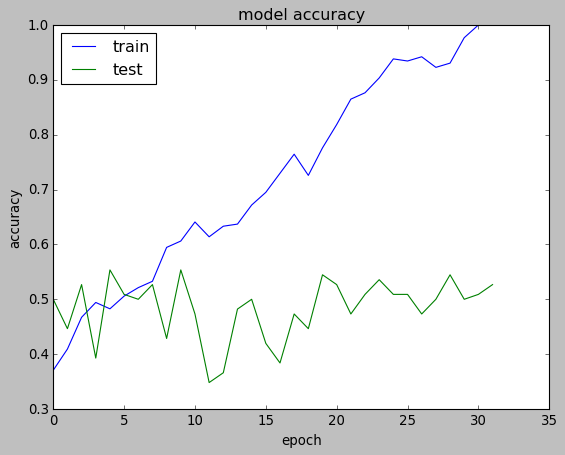

In [84]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [85]:
train_loss=history.history['loss']
val_loss=history.history['val_loss']
train_acc=history.history['acc']
val_acc=history.history['val_acc']
xc=range(nb_epoch)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']
['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


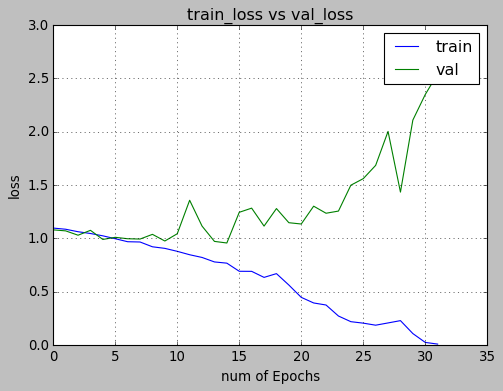

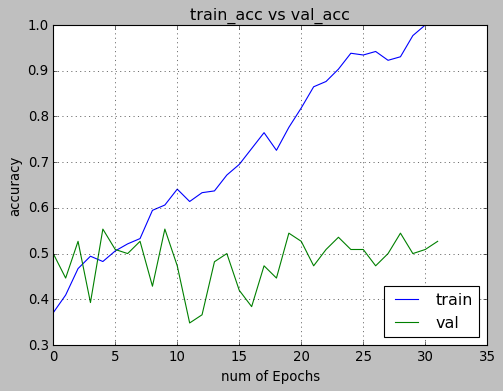

In [86]:
plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
print (plt.style.available) # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
print (plt.style.available) # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])